# EDA
This notebook is used to perform exploratory data analysis on the data.


In [1]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

path = %pwd
while "src" in path:
    %cd ..
    path = %pwd

import glob
import pandas as pd
import os
from tqdm.notebook import tqdm
from pprint import pprint

import matplotlib.pyplot as plt

from src.utils.parse_data import parse_ast, parse_concept, parse_relation

/mnt/d/Google Drive/projects/medical_txt_parser/src/notebooks
/mnt/d/Google Drive/projects/medical_txt_parser/src
/mnt/d/Google Drive/projects/medical_txt_parser


In [2]:
train_data_path = "data/train"
val_data_path = "data/val"
ast_folder_name = "ast"
concept_folder_name = "concept"
rel_folder_name = "rel"
txt_folder_name = "txt"

### Import data

In [3]:
text_files = glob.glob(train_data_path + os.sep + txt_folder_name + os.sep +  "*.txt")
filename = ""
df = pd.DataFrame()
for file in tqdm(text_files):
    with open(file, 'r') as f:
        text = f.read()
        filename = file.split("/")[-1].split(".")[0]
        ast = parse_ast(train_data_path + os.sep + ast_folder_name + os.sep +  filename + ".ast")
        concept = parse_concept(train_data_path + os.sep + concept_folder_name + os.sep +  filename + ".con")
        rel = parse_relation(train_data_path + os.sep + rel_folder_name + os.sep +  filename + ".rel")
        
        df = df.append(pd.DataFrame({"text": [text], "filename": [filename] , "concept": [concept], "ast": [ast], "rel": [rel]}), ignore_index=True)
df.head()

  0%|          | 0/170 [00:00<?, ?it/s]

text         filename  \
0  018636330 DH\n5425710\n123524\n0144918\n6/2/20...     018636330_DH   
1  026350193 RWH\n7093319\n549304\n8417371\n6/5/2...    026350193_RWH   
2  037945397 RWH\n2690633\n194867\n151887\n10/17/...    037945397_RWH   
3  044687343 ELMVH\n01719921\n1626859\n3/13/2006 ...  044687343_ELMVH   
4  060376519 DH\n0649031\n323495\n3838556\n4/5/20...     060376519_DH   

                                             concept  \
0  {'concept_text': ['a workup', 'pain', 'microsc...   
1  {'concept_text': ['flexeril', 'constipation', ...   
2  {'concept_text': ['ivf', 'near syncope', 'recu...   
3  {'concept_text': ['lisinopril pump', 'bipap', ...   
4  {'concept_text': ['dizziness', 'benign positio...   

                                                 ast  \
0  {'concept_text': ['pain', 'hyperlipidemia', 'h...   
1  {'concept_text': ['constipation', 'left should...   
2  {'concept_text': ['near syncope', 'recurrent d...   
3  {'concept_text': ['copd', 'nad', 'fatigue', 'g...   
4  {'concept_text': ['dizziness', 'benign positio...   

                                                 rel  
0  {'concept_text_1': ['po pain medications', 'a ...  
1  {'concept_text_1': [], 'start_line_1': [], 'st...  
2  {'concept_text_1': [], 'start_line_1': [], 'st...  
3  {'concept_text_1': ['bipap', 'fatigue', 'ekg',...  
4  {'concept_text_1': ['fever'], 'start_line_1': ...

In [6]:
a = df[["text", "filename"]].set_index("filename")

In [12]:
a.loc["018636330_DH"]["text"]

'018636330 DH\n5425710\n123524\n0144918\n6/2/2005 12:00:00 AM\nDischarge Summary\nSigned\nDIS\nReport Status :\nSigned\nDISCHARGE SUMMARY\nNAME :\nKOTE , OA\nUNIT NUMBER :\n509-22-30\nADMISSION DATE :\n06/02/2005\nDISCHARGE DATE :\n06/05/2005\nPRINCIPAL DIAGNOSIS :\nC5-6 disc herniation with cord compression and myelopathy .\nPRINCIPAL PROCEDURE :\nMicroscopic anterior cervical diskectomy at C5-6 and fusion .\nHISTORY OF PRESENT ILLNESS :\nThe patient is a 63-year-old female with a three-year history of bilateral hand numbness and occasional weakness .\nWithin the past year , these symptoms have progressively gotten worse , to encompass also her feet .\nShe had a workup by her neurologist and an MRI revealed a C5-6 disc herniation with cord compression and a T2 signal change at that level .\nPAST MEDICAL HISTORY :\nSignificant for hypertension , hyperlipidemia .\nMEDICATIONS ON ADMISSION :\nLipitor , Flexeril , hydrochlorothiazide and Norvasc .\nALLERGIES :\nShe has no known drug aller

In [8]:
df["concept"][0].keys()

dict_keys(['concept_text', 'start_line', 'start_word_number', 'end_line', 'end_word_number', 'concept_type'])

In [18]:
ast_df = pd.DataFrame(columns=["filename"]+list(ast.keys()))
for i, file in df.iterrows():
    ast_dict = file["ast"]
    tmp = pd.DataFrame(ast_dict)
    tmp["filename"] = file["filename"]
    ast_df = ast_df.append(tmp, ignore_index=True)
ast_df.head()

filename      concept_text start_line start_word_number end_line  \
0  018636330_DH              pain         55                10       55   
1  018636330_DH    hyperlipidemia         29                 4       29   
2  018636330_DH          her pain         47                 0       47   
3  018636330_DH  cord compression         27                16       27   
4  018636330_DH            chills         50                 9       50   

  end_word_number concept_type assertion_type  
0              10      problem   hypothetical  
1               4      problem        present  
2               1      problem        present  
3              17      problem        present  
4               9      problem   hypothetical

In [19]:
concept_df = pd.DataFrame(columns=[ "filename"]+list(concept.keys()))
for i, file in df.iterrows():
    concept_dict = file["concept"]
    tmp = pd.DataFrame(concept_dict)
    tmp["filename"] = file["filename"]
    concept_df = concept_df.append(tmp, ignore_index=True)
concept_df.head()

filename                                      concept_text start_line  \
0  018636330_DH                                          a workup         27   
1  018636330_DH                                              pain         55   
2  018636330_DH  microscopic anterior cervical diskectomy at c5-6         23   
3  018636330_DH                                    hyperlipidemia         29   
4  018636330_DH                               po pain medications         47   

  start_word_number end_line end_word_number concept_type  
0                 2       27               3         test  
1                10       55              10      problem  
2                 0       23               5    treatment  
3                 4       29               4      problem  
4                 7       47               9    treatment

In [25]:
concept_prob_df = concept_df[concept_df["concept_type"] == "problem"]
print("elements in concept_prob_df: ", len(concept_prob_df))
print("elements in ast_df: ", len(ast_df))

elements in concept_prob_df:  7073
elements in ast_df:  7073


In [36]:
concept_prob_df['concept_text'].reset_index(drop=True).equals(ast_df['concept_text'])

True

This means that the `problem` type is totally encoded in the ast data.

### Better data representation

In [51]:
# ast_concept_df = pd.DataFrame(columns=["filename"]+list(ast.keys()))
ast_concept_df = pd.DataFrame()
for i, file in df.iterrows():
    ast_dict = file["ast"]
    concept_dict = file["concept"]
    tmp_ast = pd.DataFrame(ast_dict)
    tmp_ast = tmp_ast.drop(columns=["concept_type"])
    tmp_ast = tmp_ast.rename(columns={"assertion_type": "ast_con_label"})

    #Only concepts with not "problem"
    tmp_concept = pd.DataFrame(concept_dict)
    tmp_concept = tmp_concept[tmp_concept["concept_type"] != "problem"]
    tmp_concept = tmp_concept.rename(columns={"concept_type": "ast_con_label"})
    
    tmp_ast["filename"] = file["filename"]
    tmp_concept["filename"] = file["filename"]
    ast_concept_df = ast_concept_df.append(tmp_ast, ignore_index=True)
    ast_concept_df = ast_concept_df.append(tmp_concept, ignore_index=True)
ast_concept_df.tail(100)

concept_text  start_line  start_word_number  end_line  \
16425          diaphoresis        14.0               15.0      14.0   
16426               ectopy        68.0               11.0      68.0   
16427         further pain        24.0               12.0      24.0   
16428            nontender        53.0                7.0      53.0   
16429                  jvd        47.0                1.0      47.0   
...                    ...         ...                ...       ...   
16520  hydrochlorothiazide        99.0               30.0      99.0   
16521     his electrolytes        80.0                0.0      80.0   
16522        nitroglycerin        59.0               42.0      59.0   
16523         auscultation        52.0                5.0      52.0   
16524        nitroglycerin        20.0               12.0      20.0   

       end_word_number ast_con_label   filename  
16425             15.0       present  record-84  
16426             11.0        absent  record-84  
16427             13.0        absent  record-84  
16428              7.0        absent  record-84  
16429              1.0        absent  record-84  
...                ...           ...        ...  
16520             30.0     treatment  record-84  
16521              1.0          test  record-84  
16522             42.0     treatment  record-84  
16523              5.0          test  record-84  
16524             12.0     treatment  record-84  

[100 rows x 7 columns]

### Concept Analysis

In [11]:
concept_df = pd.DataFrame(columns=[ "filename"]+list(concept.keys()))
for i, file in df.iterrows():
    concept_dict = file["concept"]
    tmp = pd.DataFrame(concept_dict)
    tmp["filename"] = file["filename"]
    concept_df = concept_df.append(tmp, ignore_index=True)
concept_df.head()

filename                                      concept_text start_line  \
0  018636330_DH                                          a workup         27   
1  018636330_DH                                              pain         55   
2  018636330_DH  microscopic anterior cervical diskectomy at c5-6         23   
3  018636330_DH                                    hyperlipidemia         29   
4  018636330_DH                               po pain medications         47   

  start_word_number end_line end_word_number concept_type  
0                 2       27               3         test  
1                10       55              10      problem  
2                 0       23               5    treatment  
3                 4       29               4      problem  
4                 7       47               9    treatment

Some annotations are duplicated in the data we have. So we need to drop them

In [12]:
concept_df.value_counts().head()

filename        concept_text         start_line  start_word_number  end_line  end_word_number  concept_type
245096078       kayciel              131         70                 131       70               treatment       2
627258104       cultures             83          0                  83        0                test            2
555509347_PUMC  multivitamins        62          0                  62        0                treatment       2
523704694       proctofoam           36          35                 36        35               treatment       2
641557794_WGH   papillary carcinoma  50          0                  50        1                problem         2
dtype: int64

In [13]:
concept_df = concept_df.drop_duplicates()
concept_df.value_counts().head()

filename      concept_text                                   start_line  start_word_number  end_line  end_word_number  concept_type
018636330_DH  10 beats of clonus                             39          16                 39        19               problem         1
record-25     placement of 8 caucasian nephrostomy catheter  21          9                  21        14               treatment       1
              initial work-up                                87          8                  87        9                test            1
              inr                                            42          0                  42        0                test            1
              intravenous albumin                            79          0                  79        1                treatment       1
dtype: int64

#### Feature `concept_type`

Text(0.5, 1.0, 'Number of Concepts per File')

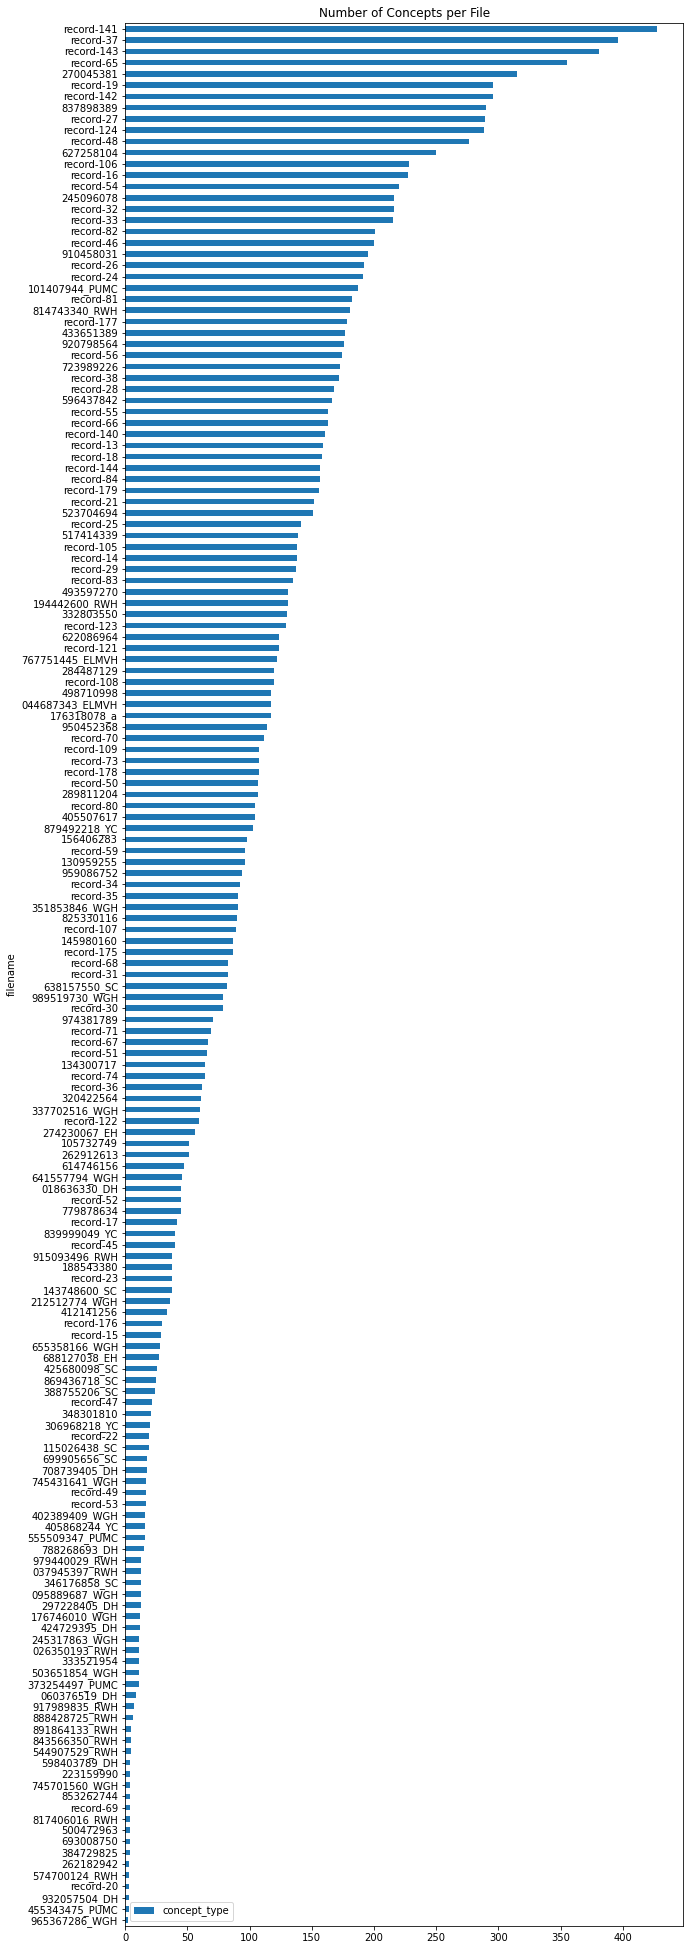

In [14]:
plt.rcParams['figure.figsize'] = [10, 35]
concept_df[["concept_type", "filename"]].groupby("filename").count().sort_values(by="concept_type", ascending=True).plot(kind="barh")
plt.title("Number of Concepts per File")

filename
concept_type          
problem           7072
test              4607
treatment         4841

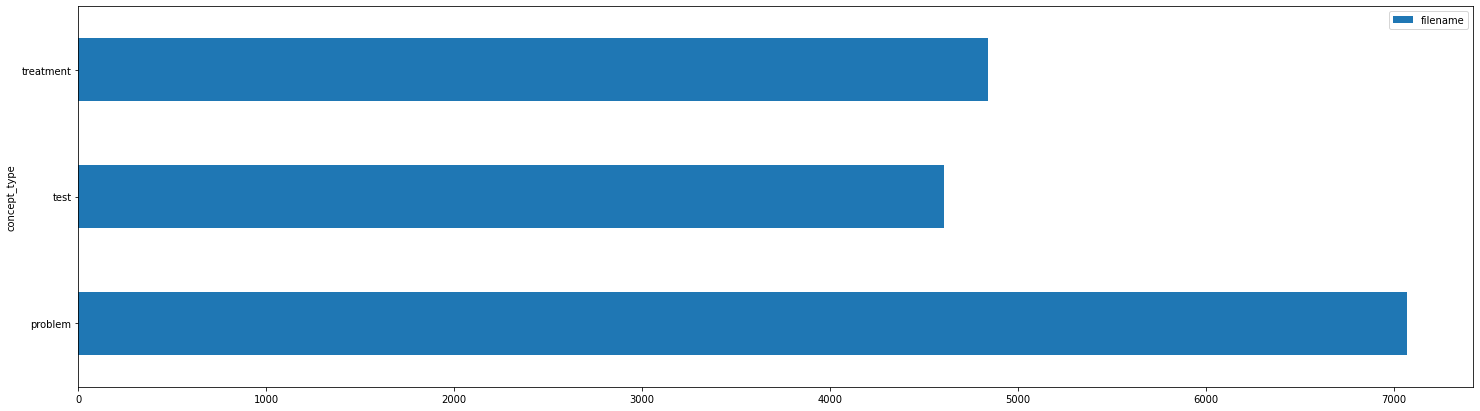

In [13]:
# number of concept types
concept_df[["concept_type", "filename"]].groupby("concept_type").count().plot(kind="barh")
concept_df[["concept_type", "filename"]].groupby("concept_type").count()

### Assertion Analysis

In [5]:
assertion_df = pd.DataFrame(columns=[ "filename"]+list(ast.keys()))
for i, file in df.iterrows():
    assertion_dict = file["ast"]
    tmp = pd.DataFrame(assertion_dict)
    tmp["filename"] = file["filename"]
    assertion_df = assertion_df.append(tmp, ignore_index=True)
assertion_df.head()

filename      concept_text start_line start_word_number end_line  \
0  018636330_DH              pain         55                10       55   
1  018636330_DH    hyperlipidemia         29                 4       29   
2  018636330_DH          her pain         47                 0       47   
3  018636330_DH  cord compression         27                16       27   
4  018636330_DH            chills         50                 9       50   

  end_word_number concept_type assertion_type  
0              10      problem   hypothetical  
1               4      problem        present  
2               1      problem        present  
3              17      problem        present  
4               9      problem   hypothetical

filename
assertion_type                        
conditional                         73
associated_with_someone_else        89
possible                           309
hypothetical                       382
absent                            1596
present                           4624

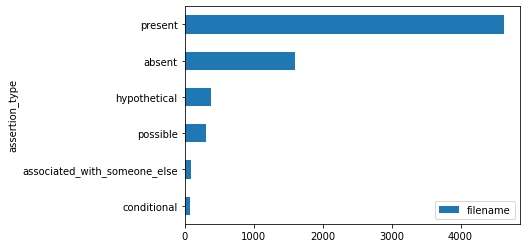

In [9]:
# count assertion types
assertion_df[["assertion_type", "filename"]].groupby("assertion_type").count().sort_values(by="filename", ascending=True).plot(kind="barh")
assertion_df[["assertion_type", "filename"]].groupby("assertion_type").count().sort_values(by="filename", ascending=True)

#### Present
problems associated with the patient can be present. This is the default category for medical problems and it contains that do not fit the definition of any of the other assertion category.

In [ ]:
# examples of as = "present"
assertion_df[assertion_df["assertion_type"] == "present"]

filename                               concept_text start_line  \
1     018636330_DH                             hyperlipidemia         29   
2     018636330_DH                                   her pain         47   
3     018636330_DH                           cord compression         27   
5     018636330_DH                              hyperreflexia         40   
6     018636330_DH  partial decompression of the spinal canal         43   
...            ...                                        ...        ...   
7066     record-84                               minimal ooze         55   
7067     record-84                10/10 substernal chest pain         12   
7068     record-84                     st elevations in v1-v3         15   
7069     record-84                                 very tense         43   
7072     record-84                               hypertension         12   

     start_word_number end_line end_word_number concept_type assertion_type  
1                    4       29               4      problem        present  
2                    0       47               1      problem        present  
3                   16       27              17      problem        present  
5                    2       40               2      problem        present  
6                    8       43              13      problem        present  
...                ...      ...             ...          ...            ...  
7066                 5       55               6      problem        present  
7067                37       12              40      problem        present  
7068                14       15              17      problem        present  
7069                 5       43               6      problem        present  
7072                30       12              30      problem        present  

[4624 rows x 8 columns]

#### Absent
the note asserts that the problem does not exist in the patient. This category also includes mentions where it is stated that the patient HAD a problem, but no longer does.

In [14]:
assertion_df[assertion_df["assertion_type"] == "absent"]

filename        concept_text start_line start_word_number  \
22       018636330_DH  known drug allergy         33                 3   
39    044687343_ELMVH                 nad         80                 0   
42    044687343_ELMVH          st changes         81                 6   
48    044687343_ELMVH             wheezes         80                19   
49    044687343_ELMVH                 uti         92                14   
...               ...                 ...        ...               ...   
7061        record-84               edema         54                 8   
7062        record-84            vomiting         24                21   
7064        record-84      any chest pain         86                 4   
7070        record-84                 pnd         25                18   
7071        record-84             gallops         51                10   

     end_line end_word_number concept_type assertion_type  
22         33               5      problem         absent  
39         80               0      problem         absent  
42         81               7      problem         absent  
48         80              19      problem         absent  
49         92              14      problem         absent  
...       ...             ...          ...            ...  
7061       54               8      problem         absent  
7062       24              21      problem         absent  
7064       86               6      problem         absent  
7070       25              18      problem         absent  
7071       51              10      problem         absent  

[1596 rows x 8 columns]

#### Possible:
the note asserts that the patient may have a problem, but there is
uncertainty expressed in the note. Possible takes precedence over absent, so
terms like “probably not” or “unlikely” categorize problems as being possible
just as “probably” and “likely” do.

In [15]:
assertion_df[assertion_df["assertion_type"] == "possible"]

filename               concept_text start_line start_word_number  \
93      060376519_DH  benign positional vertigo         35                 0   
98      060376519_DH              labyrinthitis         35                 4   
150   101407944_PUMC       primary cns neoplasm         99                11   
171   101407944_PUMC               glioblastoma         99                16   
181   101407944_PUMC           ependymal spread        100                13   
...              ...                        ...        ...               ...   
6978       record-83                  gastritis         41                33   
6979       record-83              gastric ulcer         41                35   
6980       record-83         lower gi pathology         41                40   
6986       record-83            gastroenteritis         37                 0   
6988       record-83                  infection         21                 0   

     end_line end_word_number concept_type assertion_type  
93         35               2      problem       possible  
98         35               4      problem       possible  
150        99              13      problem       possible  
171        99              16      problem       possible  
181       100              14      problem       possible  
...       ...             ...          ...            ...  
6978       41              33      problem       possible  
6979       41              36      problem       possible  
6980       41              42      problem       possible  
6986       37               0      problem       possible  
6988       21               0      problem       possible  

[309 rows x 8 columns]

#### Conditional:
the mention of the medical problem asserts that the patient
experiences the problem only under certain conditions. Allergies can fall into
this category.

In [16]:
assertion_df[assertion_df["assertion_type"] == "conditional"]

filename                      concept_text start_line  \
345   143748600_SC  episodes of atypical cp x 1 week         52   
442    176318078_a  bleeding from the mouth and nose         29   
454    176318078_a                          headache         43   
457    176318078_a               marked hyperkalemia         88   
461    176318078_a                         epistaxis         21   
...            ...                               ...        ...   
6756     record-80                             dusky         25   
6953     record-83                  only mild nausea         42   
6983     record-83                        occ nausea         37   
6995     record-84                           dyspnea         25   
7065     record-84                           dyspnea         86   

     start_word_number end_line end_word_number concept_type assertion_type  
345                 23       52              29      problem    conditional  
442                  3       29               8      problem    conditional  
454                  3       43               3      problem    conditional  
457                 10       88              11      problem    conditional  
461                  0       21               0      problem    conditional  
...                ...      ...             ...          ...            ...  
6756                14       25              14      problem    conditional  
6953                 7       42               9      problem    conditional  
6983                10       37              11      problem    conditional  
6995                12       25              12      problem    conditional  
7065                15       86              15      problem    conditional  

[73 rows x 8 columns]

#### Hypothetical:
medical problems that the note asserts the patient may
develop.

In [17]:
assertion_df[assertion_df["assertion_type"] == "hypothetical"]

filename                  concept_text start_line start_word_number  \
0     018636330_DH                          pain         55                10   
4     018636330_DH                        chills         50                 9   
18    018636330_DH                        fevers         50                 7   
19    018636330_DH                      numbness         50                14   
20    018636330_DH  bowel and bladder disruption         50                17   
...            ...                           ...        ...               ...   
7028     record-84           shortness of breath         99                25   
7029     record-84                any chest pain         87                12   
7040     record-84          difficulty breathing         87                18   
7041     record-84                      pressure         87                16   
7045     record-84               light-headiness         87                23   

     end_line end_word_number concept_type assertion_type  
0          55              10      problem   hypothetical  
4          50               9      problem   hypothetical  
18         50               7      problem   hypothetical  
19         50              14      problem   hypothetical  
20         50              20      problem   hypothetical  
...       ...             ...          ...            ...  
7028       99              27      problem   hypothetical  
7029       87              14      problem   hypothetical  
7040       87              19      problem   hypothetical  
7041       87              16      problem   hypothetical  
7045       87              23      problem   hypothetical  

[382 rows x 8 columns]

#### Not associated with Patient:
the mention of the medical problem is associated
with someone who is not the patient.

In [19]:
assertion_df[assertion_df["assertion_type"] == "associated_with_someone_else"]

filename                  concept_text start_line  \
133   101407944_PUMC                           cva         49   
136   101407944_PUMC                      diabetes         49   
146   101407944_PUMC          hypercholesterolemia         49   
199   101407944_PUMC                           cad         49   
245        130959255                 heart disease         38   
...              ...                           ...        ...   
6809       record-81          mentally handicapped         30   
6827       record-81          mentally handicapped         49   
6831       record-81  human immunodeficiency virus         47   
7031       record-84                         an mi         33   
7060       record-84       coronary artery disease         12   

     start_word_number end_line end_word_number concept_type  \
133                  8       49               8      problem   
136                  6       49               6      problem   
146                 10       49              10      problem   
199                  2       49               2      problem   
245                  8       38               9      problem   
...                ...      ...             ...          ...   
6809                 3       30               4      problem   
6827                11       49              12      problem   
6831                20       47              22      problem   
7031                 6       33               7      problem   
7060                19       12              21      problem   

                    assertion_type  
133   associated_with_someone_else  
136   associated_with_someone_else  
146   associated_with_someone_else  
199   associated_with_someone_else  
245   associated_with_someone_else  
...                            ...  
6809  associated_with_someone_else  
6827  associated_with_someone_else  
6831  associated_with_someone_else  
7031  associated_with_someone_else  
7060  associated_with_someone_else  

[89 rows x 8 columns]

### Relations Analysis

In [33]:
print(df.rel[0])


{'concept_text_1': ['po pain medications', 'a postoperative ct scan', 'percocet', 'c5-6 disc herniation', 'c5-6 disc herniation', 'a c5-6 disc herniation', 'an mri', 'an mri', 'an mri', 'her exam'], 'start_line_1': [47, 43, 55, 21, 21, 27, 27, 27, 27, 44], 'start_word_number_1': [7, 2, 1, 0, 0, 11, 8, 8, 8, 3], 'end_line_1': [47, 43, 55, 21, 21, 27, 27, 27, 27, 44], 'end_word_number_1': [9, 5, 1, 2, 2, 14, 9, 9, 9, 4], 'concept_text_2': ['her pain', 'partial decompression of the spinal canal', 'pain', 'cord compression', 'myelopathy', 'cord compression', 'a c5-6 disc herniation', 'cord compression', 'a t2 signal change', 'her hyperreflexia'], 'start_line_2': [47, 43, 55, 21, 21, 27, 27, 27, 27, 44], 'start_word_number_2': [0, 8, 10, 4, 7, 16, 11, 16, 19, 9], 'end_line_2': [47, 43, 55, 21, 21, 27, 27, 27, 27, 44], 'end_word_number_2': [1, 13, 10, 5, 7, 17, 14, 17, 22, 10], 'relation_type': ['TrIP', 'TeRP', 'TrAP', 'PIP', 'PIP', 'PIP', 'TeRP', 'TeRP', 'TeRP', 'TeCP']}
